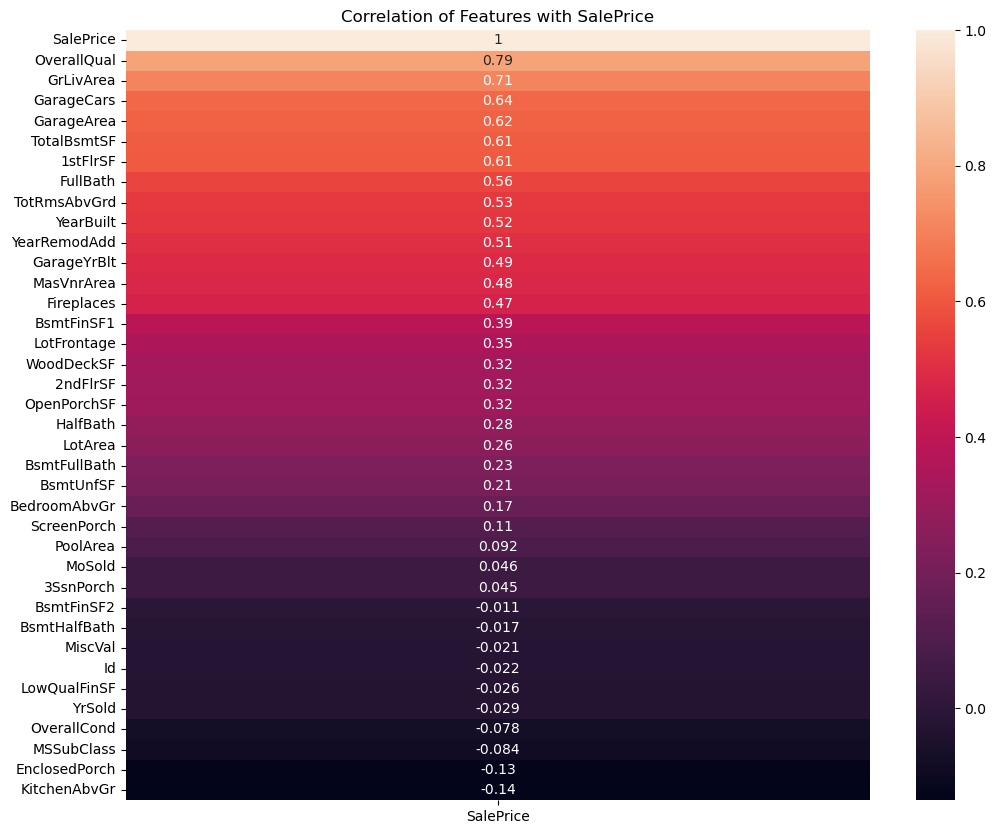


Selected Top Features: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']

Mean Squared Error: 1564517268.17
R² Score: 0.80


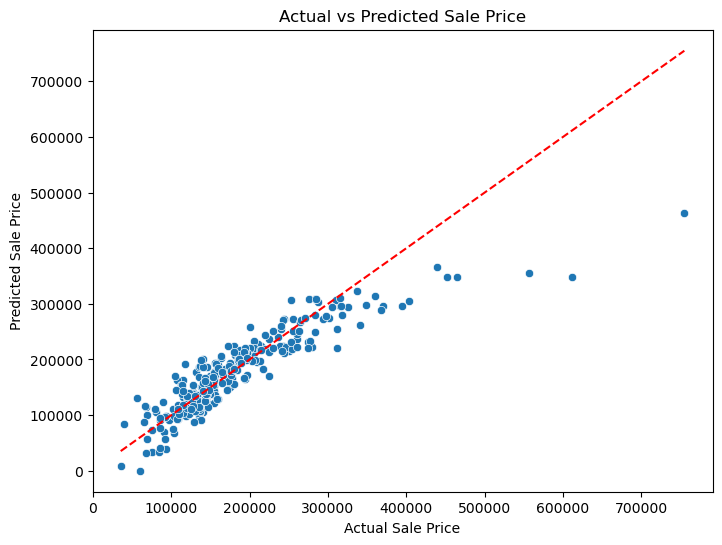

Predicted Sale Price: $3551419.80


In [18]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
df = pd.read_csv('../data/train.csv')

# Step 3: Exploratory Data Analysis (EDA)
#print("Dataset Shape:", df.shape)        # Check number of rows and columns
#print("\nFirst 5 rows:\n", df.head())     # See first few records
#print("\nMissing Values:\n", df.isnull().sum())  # Check for missing values

# # Plot correlation heatmap with SalePrice
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title("Correlation of Features with SalePrice")
plt.show()

# # Step 4: Data Preprocessing
# Drop columns that have too many missing values or are not useful
df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

# # Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# # Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# # One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# # Step 5: Feature Selection
# # Select only numeric columns for correlation
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# # Find top 5 features positively and negatively correlated with SalePrice
correlation = df[numeric_features].corr()['SalePrice'].sort_values(ascending=False)
top_features = correlation[1:6].index.tolist() + correlation[-5:].index.tolist()

print("\nSelected Top Features:", top_features)

# # Step 6: Preparing Data for Modeling
# # Define input features (X) and target variable (y)
X = df[top_features]
y = df['SalePrice']

# # Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the features (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Step 7: Model Training
# # Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# # Step 8: Model Prediction and Evaluation
# # Predict SalePrice on test set
y_pred = model.predict(X_test_scaled)

# # # Evaluate the model using MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# # Step 9: Visualization of Predictions
# # Plot Actual vs Predicted SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree reference line
plt.show()



# Example new house input (make sure order matches your 'top_features')
new_house = pd.DataFrame([{
#'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'




    
    'OverallQual': 7,
    'GrLivArea': 2000,
    'GarageCars': 2,
    'GarageArea':23,
    'TotalBsmtSF': 1000,
    'YrSold':2019,                          
    'OverallCond': 1500,
    'MSSubClass': 1,
    'EnclosedPorch': 0,
    'KitchenAbvGr': 0
}])

# Scale it
new_house_scaled = scaler.transform(new_house)

# Predict
predicted_price = model.predict(new_house_scaled)
print(f"Predicted Sale Price: ${predicted_price[0]:.2f}")

